In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dexplot as dxp

In [2]:
transactions = pd.read_csv("transactions_v2.csv")
members = pd.read_csv('members_v3.csv')
train = pd.read_csv("train_v2.csv")
test = pd.read_csv("sample_submission_v2.csv")
user = pd.read_csv("user_logs_v2.csv")

# Analysis on Training data set 

In [3]:
train.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [4]:
train.shape

(970960, 2)

In [5]:
# checking for any null values in the DataFrame
train.isnull().values.any()

False

In [6]:
# checking for duplicate value in the dataframe
train.duplicated().any()

False

Text(0.5, 1.0, 'Class label distribution')

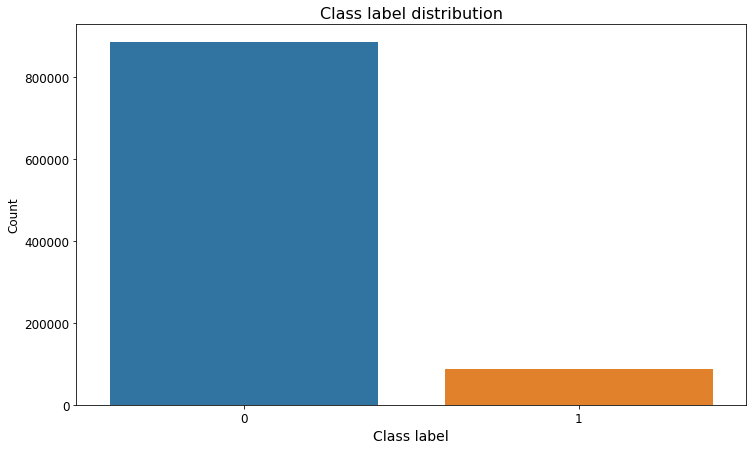

In [7]:
plt.figure(figsize=(12,7))
ax = sns.countplot(data=train, x='is_churn')
plt.xticks(size=12)
plt.xlabel('Class label', size=14)
plt.yticks(size=12)
plt.ylabel('Count', size=12)
plt.title('Class label distribution', size=16)

The training dataset is unbalanced, there are a lot of non-churned useres compared to those who churned. 




# Analysis on Members data

In [8]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [9]:
members.shape

(6769473, 6)

In [10]:
train_members = pd.merge(train, members, on = "msno" , how = "left")
train_members.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,20131223.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,20131227.0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,20140109.0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,20140125.0


In [11]:
train_members.shape

(970960, 7)

In [12]:
train_members.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    970960 non-null  object 
 1   is_churn                970960 non-null  int64  
 2   city                    860967 non-null  float64
 3   bd                      860967 non-null  float64
 4   gender                  388905 non-null  object 
 5   registered_via          860967 non-null  float64
 6   registration_init_time  860967 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 59.3+ MB


In [13]:
train_members.duplicated("msno").sum()

0

In [14]:
train_members.isnull().sum()

msno                           0
is_churn                       0
city                      109993
bd                        109993
gender                    582055
registered_via            109993
registration_init_time    109993
dtype: int64

### City

In [15]:
train_members['city'].value_counts()

1.0     442598
13.0     97136
5.0      70706
4.0      47227
15.0     43187
22.0     41991
6.0      26066
14.0     20013
12.0     11383
9.0       9526
11.0      9138
18.0      7792
8.0       7589
10.0      6470
17.0      5476
21.0      5199
3.0       5057
7.0       2652
16.0       944
20.0       677
19.0       140
Name: city, dtype: int64

In [16]:
kk = train_members[train_members["city"].notna()]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


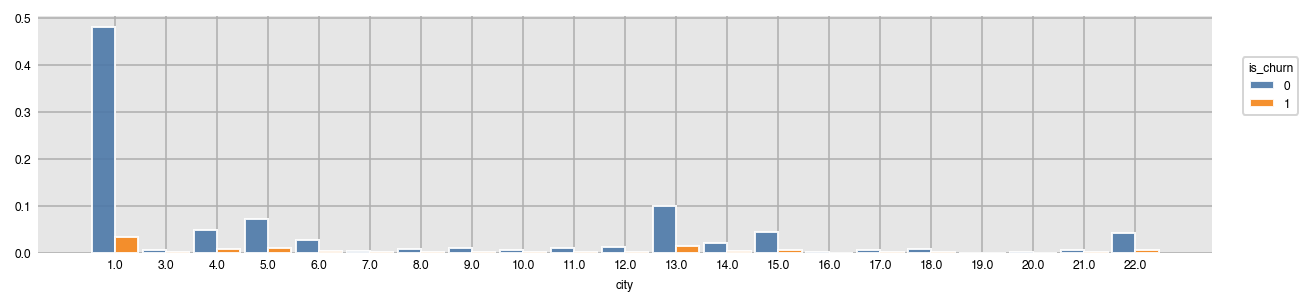

In [17]:
dxp.count('city', data=kk, split='is_churn', normalize=True)

In [18]:
temp = pd.DataFrame(train_members.groupby("city")["is_churn"].agg(lambda x: x.eq(1).sum())).reset_index()

In [19]:
temp['total_users'] = pd.DataFrame(train_members.groupby("city")["is_churn"].agg(total_users='count')).reset_index()['total_users']

In [20]:
temp['average_churned_users'] = pd.DataFrame(train_members.groupby("city")["is_churn"].agg(average_churned_users='mean')).reset_index()['average_churned_users']

In [21]:
temp.sort_values(by=['total_users'],inplace=True, ascending=False)

In [22]:
temp

,city,is_churn,total_users,average_churned_users
0,1.0,28351,442598,0.064056
11,13.0,11950,97136,0.123023
3,5.0,9333,70706,0.131997
2,4.0,6094,47227,0.129036
13,15.0,5538,43187,0.128233
20,22.0,5284,41991,0.125836
4,6.0,3358,26066,0.128827
12,14.0,2370,20013,0.118423
10,12.0,1585,11383,0.139243
7,9.0,1200,9526,0.125971


### Birthday

<AxesSubplot:xlabel='is_churn', ylabel='bd'>

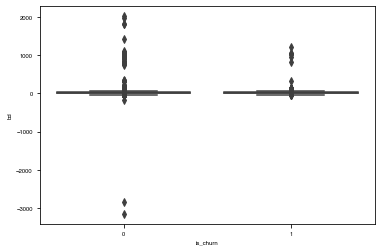

In [23]:
sns.boxplot(x='is_churn', y='bd', data=train_members)

In [24]:
train_members['bd'] = train_members['bd'].apply(lambda x: x if (x < 85.0) and (x > 5.0) else np.nan)

In [25]:
# Delete outliers 
bins = np.arange(1, 10) * 10
train_members['category'] = np.digitize(train_members['bd'], bins, right=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


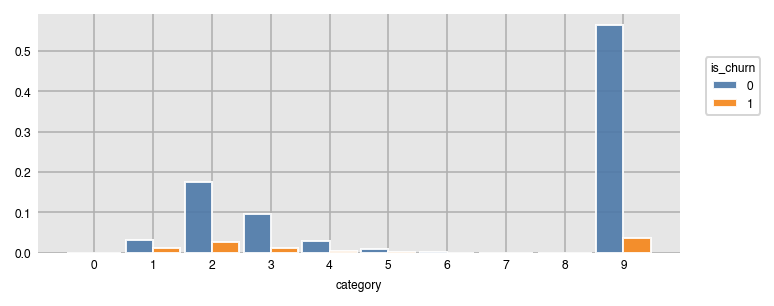

In [26]:
dxp.count('category', data=train_members, split='is_churn', normalize=True)

### Gender 

In [27]:
train_members['gender'].unique()

array(['male', nan, 'female'], dtype=object)

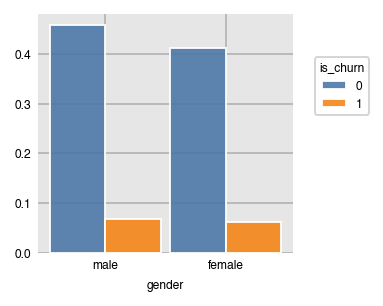

In [28]:
dxp.count('gender', data=train_members, split='is_churn', normalize=True)

By looking at the average churning rate for both the genders, it is almost same so to avoid lot of feauture it is best to drop the column gender because it doesn't add much value to our dataset 

### Registred via

In [29]:
train_members['registered_via'].unique()

array([ 3.,  7.,  9., nan,  4., 13.])

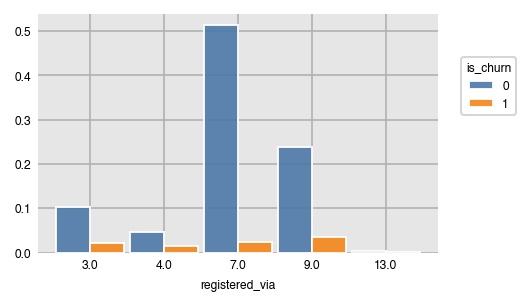

In [30]:
dxp.count('registered_via', data=train_members, split='is_churn', normalize=True)

TODO : replace the nan values by category 0 

## registration_init_time

In [31]:
train_members['registration_init_time'] = pd.to_datetime(train_members['registration_init_time'], format='%Y%m%d')

In [32]:
train_members['year'] = train_members['registration_init_time'].dt.year.values
train_members['month'] = train_members['registration_init_time'].dt.month.values
train_members['weekday'] = train_members['registration_init_time'].dt.weekday.values

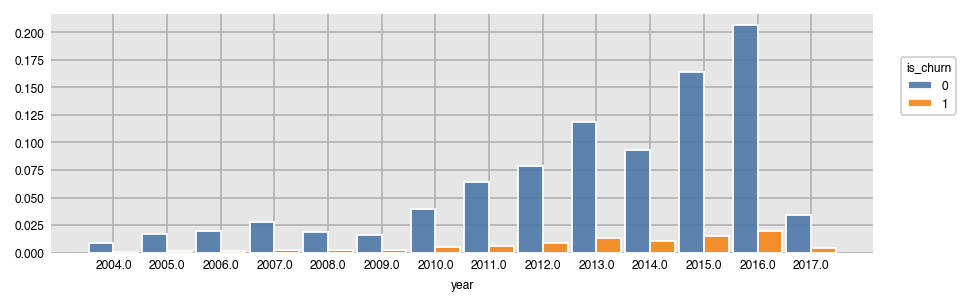

In [33]:
dxp.count('year', data=train_members, split='is_churn', normalize=True)

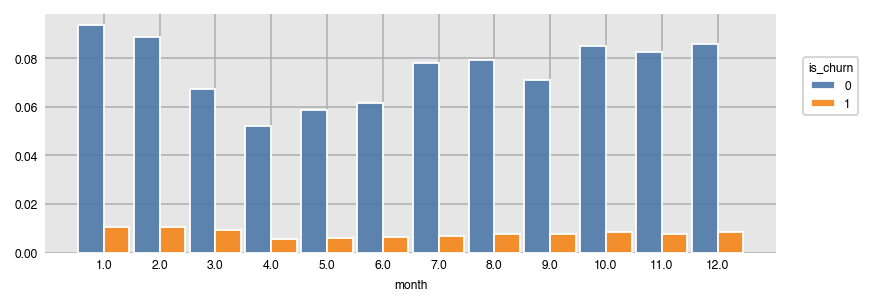

In [34]:
dxp.count('month', data=train_members, split='is_churn', normalize=True)

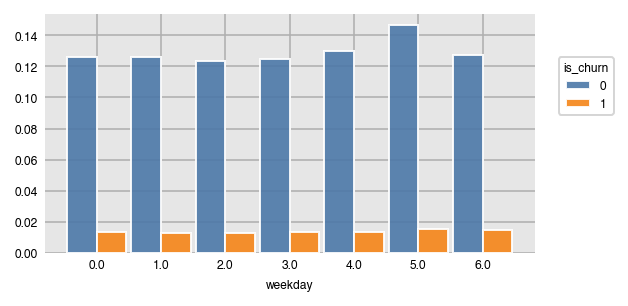

In [35]:
dxp.count('weekday', data=train_members, split='is_churn', normalize=True)

In [36]:
dates = list(train_members.sort_values('registration_init_time')['registration_init_time'])
print(dates[len(dates)//2])

2015-02-04 00:00:00


To Do : replace the nan values by the mean value time

### All in one 

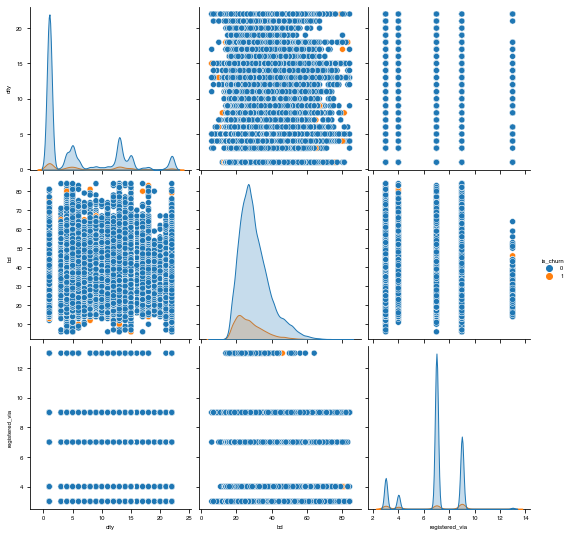

In [37]:
sns.pairplot(train_members, vars=['city', 'bd', 'registered_via'], hue='is_churn')

# Transactions

In [38]:
transactions.shape

(1431009, 9)

In [39]:
transactions.duplicated("msno").sum()

233959

In [40]:
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], format='%Y%m%d')

In [41]:
transactions = transactions.sort_values(by=['transaction_date'])
transactions = transactions.drop_duplicates(subset=['msno'], keep='last')

In [42]:
transactions.shape

(1197050, 9)

In [43]:
train_members.shape

(970960, 11)

In [44]:
train_mt = pd.merge(train_members, transactions, on='msno', how='left')

In [45]:
train_mt.shape

(970960, 19)

In [46]:
train_mt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   msno                    970960 non-null  object        
 1   is_churn                970960 non-null  int64         
 2   city                    860967 non-null  float64       
 3   bd                      386483 non-null  float64       
 4   gender                  388905 non-null  object        
 5   registered_via          860967 non-null  float64       
 6   registration_init_time  860967 non-null  datetime64[ns]
 7   category                970960 non-null  int64         
 8   year                    860967 non-null  float64       
 9   month                   860967 non-null  float64       
 10  weekday                 860967 non-null  float64       
 11  payment_method_id       933578 non-null  float64       
 12  payment_plan_days       933578

In [47]:
train_mt.isnull().sum()

msno                           0
is_churn                       0
city                      109993
bd                        584477
gender                    582055
registered_via            109993
registration_init_time    109993
category                       0
year                      109993
month                     109993
weekday                   109993
payment_method_id          37382
payment_plan_days          37382
plan_list_price            37382
actual_amount_paid         37382
is_auto_renew              37382
transaction_date           37382
membership_expire_date     37382
is_cancel                  37382
dtype: int64

In [48]:
train_mt['payment_method_id'].unique()

array([nan, 36., 15., 41., 40., 38., 32., 39., 37., 35., 20., 30., 29.,
       17., 16., 19., 13., 22., 34., 28., 10., 33., 31., 26., 27., 21.,
       12., 18., 23., 11.,  3., 14.,  6.,  8.])

Text(0.5, 1.0, 'Class label distribution')

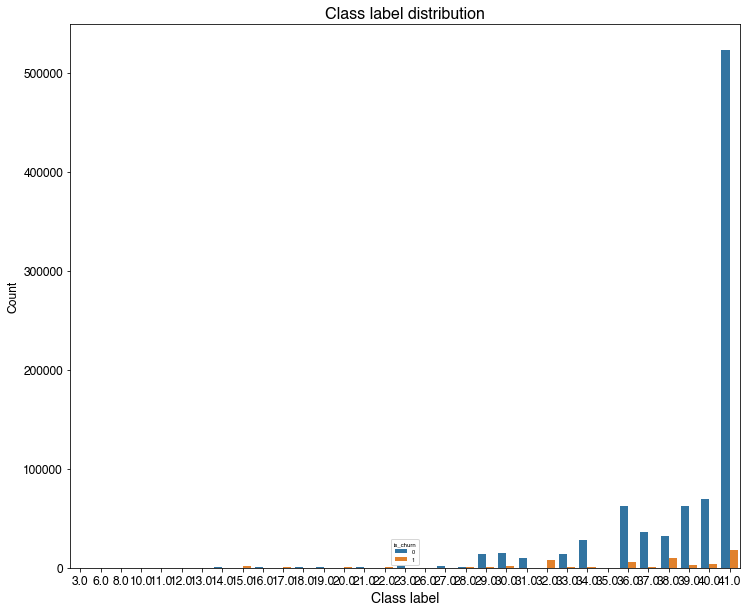

In [49]:
plt.figure(figsize=(12,10))
sns.countplot(data=train_mt, x='payment_method_id',hue='is_churn')
plt.xticks(size=12)
plt.xlabel('Class label', size=14)
plt.yticks(size=12)
plt.ylabel('Count', size=12)
plt.title('Class label distribution', size=16)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


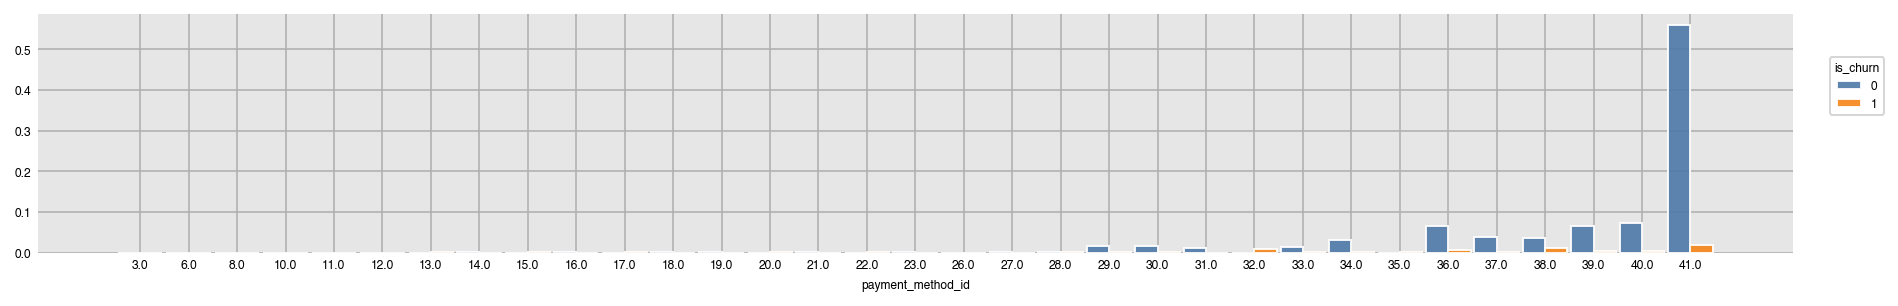

In [50]:
dxp.count('payment_method_id', data=train_mt, split='is_churn', normalize=True)

In [51]:
train_mt['payment_plan_days'].unique()

array([ nan,  30.,  90., 410., 180., 195., 360., 240.,   7., 120., 100.,
       365.,  70.,  60.,   1., 200., 400., 395.,  80.,  10., 230., 450.,
        14., 110.,   3., 270., 415.,  35.,   0.])

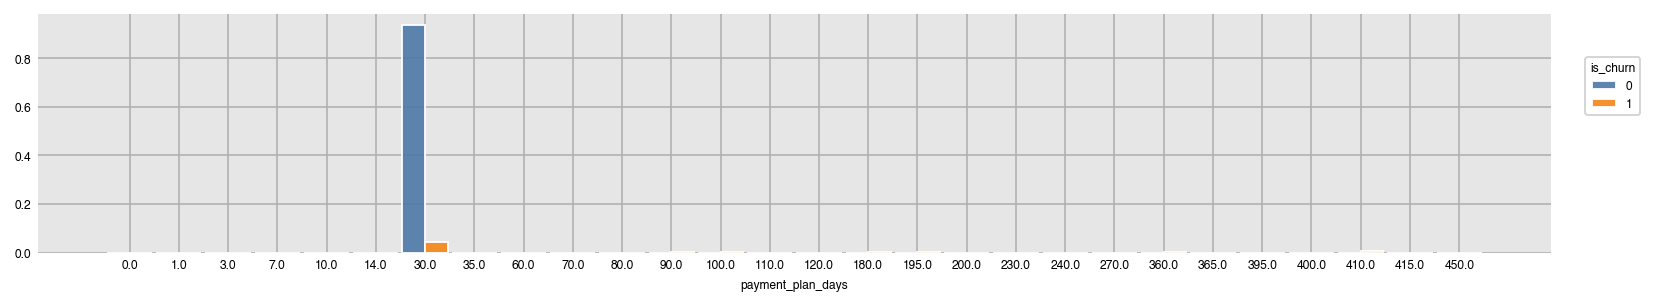

In [52]:
dxp.count('payment_plan_days', data=train_mt, split='is_churn', normalize=True)

<AxesSubplot:xlabel='is_churn', ylabel='payment_plan_days'>

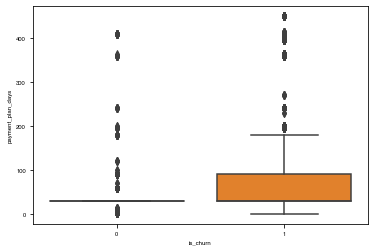

In [53]:
sns.boxplot(x='is_churn', y='payment_plan_days', data=train_mt)

In [54]:
# check how they define payment_plan_days to define whats an outlier 

In [56]:
train_mt['plan_list_price'].unique()

array([      nan, 1.800e+02, 3.000e+02, 1.490e+02, 9.900e+01, 1.788e+03,
       4.770e+02, 2.980e+02, 5.360e+02, 6.000e+02, 8.940e+02, 1.000e+02,
       1.200e+03, 4.470e+02, 0.000e+00, 4.800e+02, 1.290e+02, 3.500e+02,
       1.299e+03, 9.300e+02, 1.500e+02, 1.599e+03, 7.990e+02, 1.200e+02,
       4.000e+02, 3.500e+01, 1.150e+03, 4.500e+02, 1.190e+02, 1.000e+03,
       5.000e+02, 2.000e+03, 1.000e+00, 1.399e+03, 1.340e+02, 6.990e+02,
       1.260e+02, 2.100e+02, 5.960e+02, 1.310e+02, 2.650e+02, 7.000e+01,
       1.430e+02])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


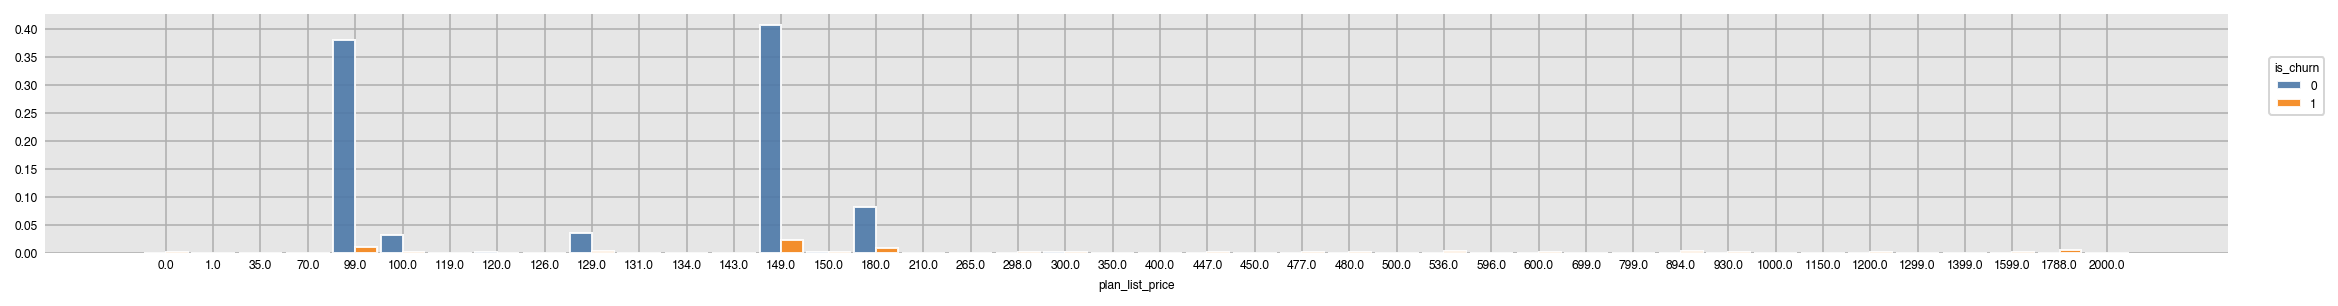

In [57]:
dxp.count('plan_list_price', data=train_mt, split='is_churn', normalize=True)

<AxesSubplot:xlabel='is_churn', ylabel='plan_list_price'>

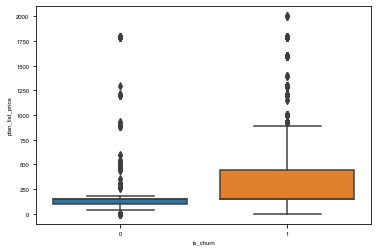

In [58]:
sns.boxplot(x='is_churn', y='plan_list_price', data=train_mt)

In [59]:
# Delete outliers 

In [60]:
train_mt['actual_amount_paid'].unique()

array([      nan, 1.800e+02, 3.000e+02, 1.490e+02, 9.900e+01, 1.788e+03,
       4.770e+02, 2.980e+02, 5.360e+02, 6.000e+02, 8.940e+02, 1.000e+02,
       1.200e+03, 4.470e+02, 0.000e+00, 4.800e+02, 1.290e+02, 3.500e+02,
       1.299e+03, 9.300e+02, 1.500e+02, 1.599e+03, 7.990e+02, 4.000e+02,
       3.500e+01, 1.150e+03, 4.500e+02, 1.190e+02, 1.200e+02, 1.000e+03,
       5.000e+02, 2.000e+03, 1.000e+00, 1.399e+03, 1.340e+02, 6.990e+02,
       1.270e+02, 2.100e+02, 5.960e+02, 1.310e+02, 2.650e+02, 7.000e+01,
       1.430e+02])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


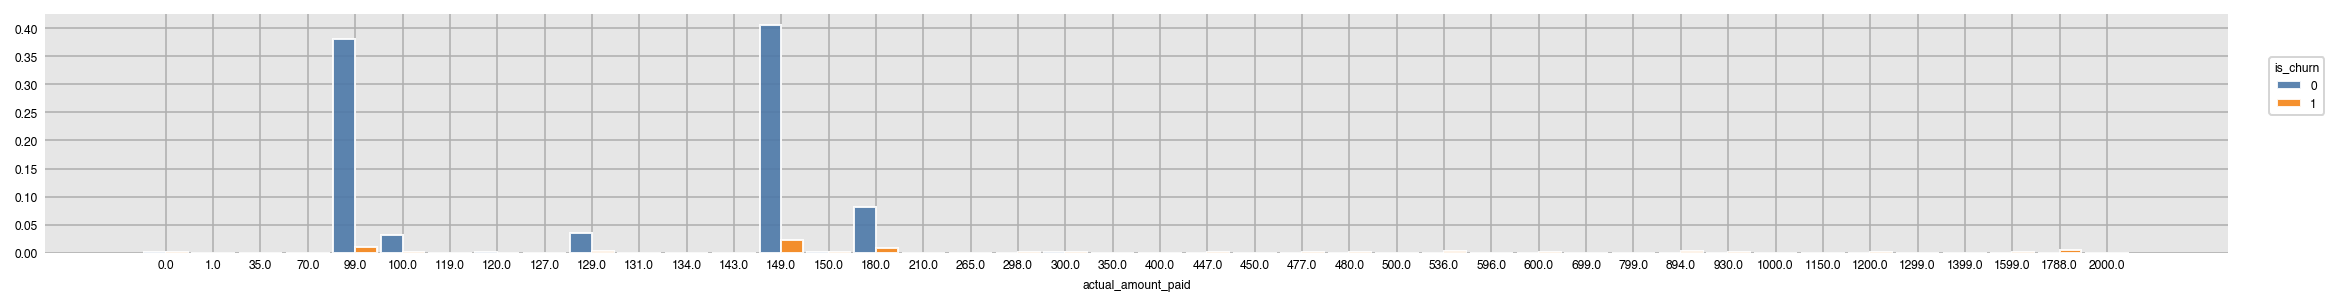

In [61]:
dxp.count('actual_amount_paid', data=train_mt, split='is_churn', normalize=True)

<AxesSubplot:xlabel='is_churn', ylabel='actual_amount_paid'>

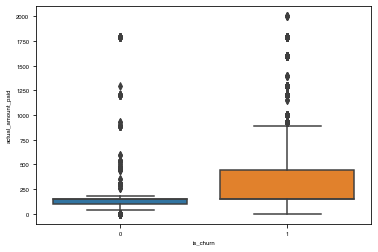

In [62]:
sns.boxplot(x='is_churn', y='actual_amount_paid', data=train_mt)

In [63]:
# Delete Outliers 

In [64]:
train_mt['is_auto_renew'].unique()

array([nan,  0.,  1.])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


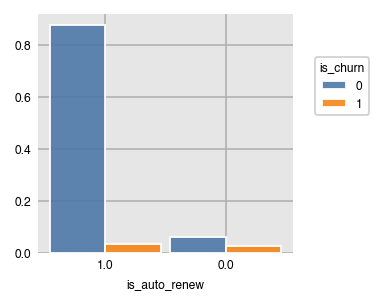

In [65]:
dxp.count('is_auto_renew', data=train_mt, split='is_churn', normalize=True)

In [66]:
# Replace Nan Values 

In [69]:
train_mt['year'] = train_mt['transaction_date'].dt.year.values
train_mt['month'] = train_mt['transaction_date'].dt.month.values

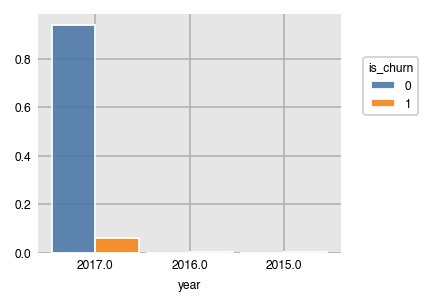

In [70]:
dxp.count('year', data=train_mt, split='is_churn', normalize=True)

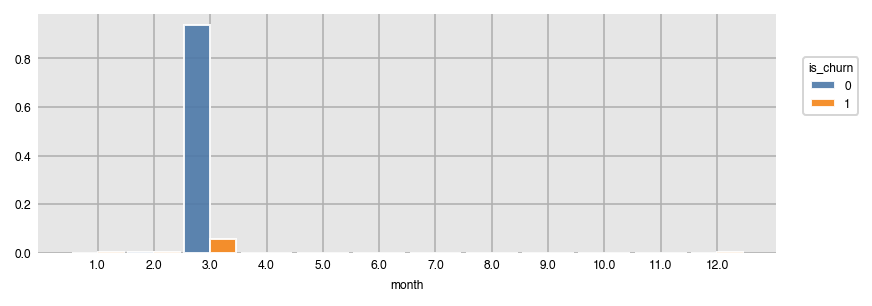

In [71]:
dxp.count('month', data=train_mt, split='is_churn', normalize=True)

In [72]:
# Delete outliers and Nan values 

In [73]:
train_mt['membership_expire_date'] = pd.to_datetime(train_mt['membership_expire_date'], format='%Y%m%d')
train_mt['ex_year'] = train_mt['membership_expire_date'].dt.year.values
train_mt['ex_month'] = train_mt['membership_expire_date'].dt.month.values


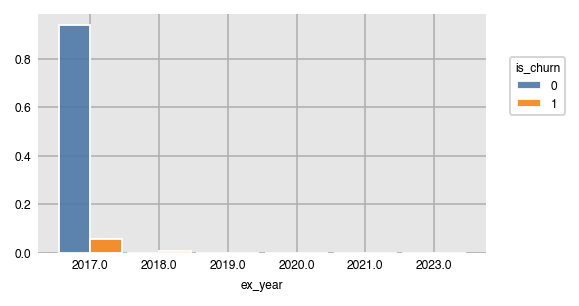

In [74]:
dxp.count('ex_year', data=train_mt, split='is_churn', normalize=True)

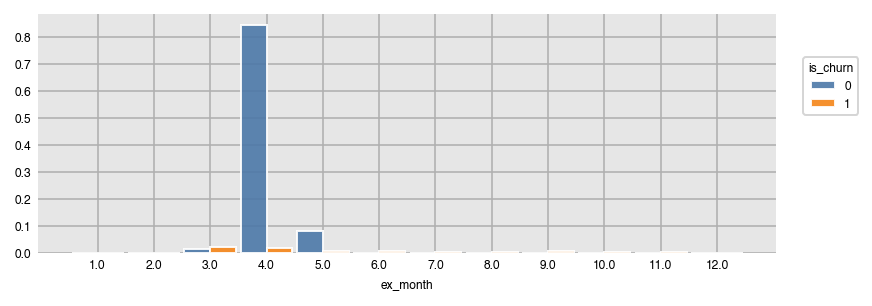

In [75]:
dxp.count('ex_month', data=train_mt, split='is_churn', normalize=True)

In [76]:
train_mt['is_cancel'].unique()

array([nan,  0.,  1.])

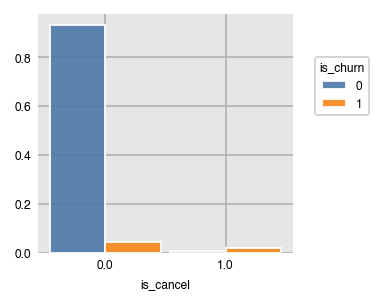

In [77]:
dxp.count('is_cancel', data=train_mt, split='is_churn', normalize=True)

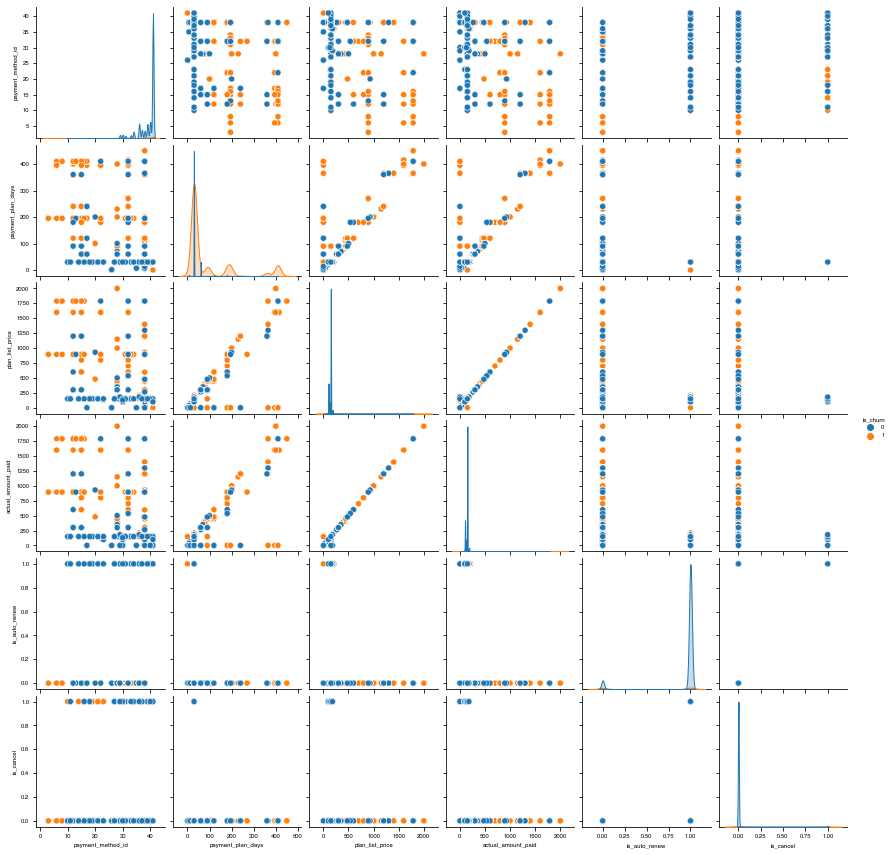

In [78]:
sns.pairplot(train_mt, vars=['payment_method_id', 'payment_plan_days', 'plan_list_price', 'actual_amount_paid', 'is_auto_renew', 'is_cancel'], height=2, hue='is_churn')


In [79]:
user.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [80]:
user.shape

(18396362, 9)

In [81]:
user.duplicated("msno").sum()

17292468

In [82]:
user = user.groupby('msno',as_index=False).sum()
user.drop(columns=['date'],axis=1,inplace=True)
user.head()

,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,86,11,10,5,472,530,117907.425
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,191,90,75,144,589,885,192527.892
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,43,12,15,12,485,468,115411.260
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,207,163,100,64,436,828,149896.558
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,105,24,39,35,479,230,116433.247


In [83]:
user.shape

(1103894, 8)

In [84]:
user.duplicated("msno").sum()

0

In [85]:
train_mtu = pd.merge(train_mt, user, on='msno', how='left')

In [86]:
train_mtu.shape

(970960, 28)

In [87]:
train_mtu.isnull().sum()

msno                           0
is_churn                       0
city                      109993
bd                        584477
gender                    582055
registered_via            109993
registration_init_time    109993
category                       0
year                       37382
month                      37382
weekday                   109993
payment_method_id          37382
payment_plan_days          37382
plan_list_price            37382
actual_amount_paid         37382
is_auto_renew              37382
transaction_date           37382
membership_expire_date     37382
is_cancel                  37382
ex_year                    37382
ex_month                   37382
num_25                    216409
num_50                    216409
num_75                    216409
num_985                   216409
num_100                   216409
num_unq                   216409
total_secs                216409
dtype: int64

In [88]:
train_mtu.duplicated("msno").sum()

0

<AxesSubplot:xlabel='is_churn', ylabel='num_25'>

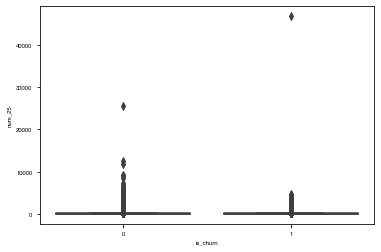

In [89]:
sns.boxplot(x='is_churn', y='num_25', data=train_mtu)

In [ ]:
sns.pairplot(train_mtu, vars=['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs'], hue='is_churn')